# Gold recovery

The company develops solutions for the efficient operation of industrial enterprises. It is necessary to develop a prototype of machine learning for the company.

The model should predict the recovery rate of gold from gold-bearing ore. The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

**Project objective**

Predict the recovery rate of gold from gold-bearing ore.

**Data description**

Technological process:

1. `Flotation`

A mixture of gold-bearing ore is fed into the flotation plant. After enrichment, a rough concentrate and "dump tails" are obtained, that is, product residues with a low concentration of valuable metals.
The stability of this process is affected by the unstable and not optimal physico-chemical state of the flotation pulp (a mixture of solid particles and liquid).

2. `Cleaning`
The rough concentrate undergoes two purifications. At the output, the final concentrate and new dump tails are obtained.

*Data description*

**Technological process**
* `Rougher feed` — raw materials
* `Rougher additives (or reagent additives)` — flotation reagents: Xanthate, Sulfate, Depressant
* `Xanthate` — xanthogenate (promoter, or flotation activator);
* `Sulfate` — sulfate (in this production sodium sulfide);
* `Depressant` — depressant (sodium silicate).
* `Rough process` — flotation
* `Rougher tails` — dump tails
* `Float banks` — flotation plant
* `Cleaner process` — cleaning
* `Rougher Au` — rough gold concentrate
* `Final Au` — final gold concentrate

**Stages parameters**
* `air amount` — air volume
* `fluid levels` — liquid level
* `feed size` — the size of the raw material granules
* `feed rate` — feed rate

**[stage].[parameter_type].[parameter_name]**

**Possible values for the block *stage***:
* `rougher` — flotation
* `primary_cleaner` — primary cleaning
* `secondary_cleaner` — secondary cleaning
* `final` — final characteristics

**Possible values for the block *parameter type***:
* `input` — raw material parameters
* `output` — product parameters
* `state` — parameters characterizing the current state
* `calculation` — design characteristics

**Calculation of efficiency**

The enrichment efficiency is calculated by the formula:
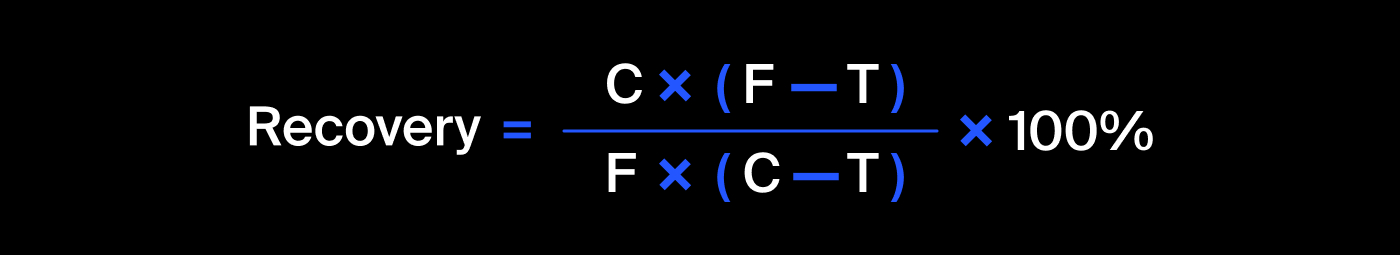
* C – the proportion of gold in the concentrate after flotation/purification;
* F – the proportion of gold in the raw material/concentrate before flotation/purification;
* T – the proportion of gold in the tailings after flotation/purification.

**Quality metric**
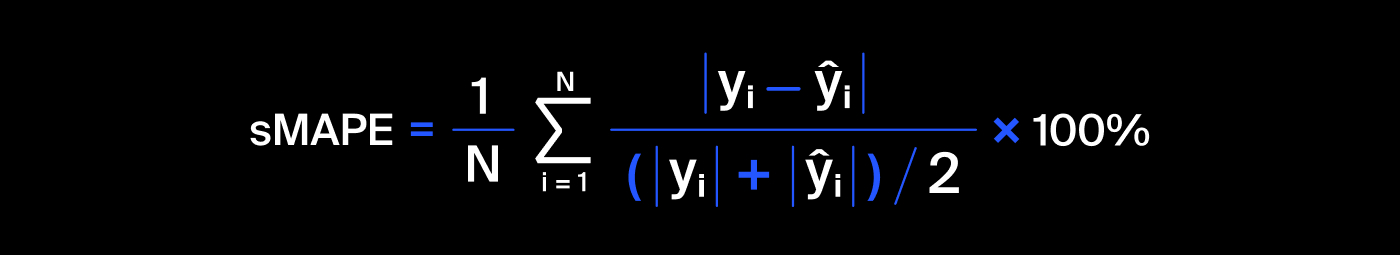

The final metric consists of two values:

**Final sMAPE = 25% * sMAPE(rougher) + 75% * sMAPE(final)**

**Table of content**

<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#General-overview" data-toc-modified-id="General-overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>General overview</a></span></li><li><span><a href="#Calculation-of-the-enrichment-efficiency-check" data-toc-modified-id="Calculation-of-the-enrichment-efficiency-check-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculation of the enrichment efficiency check</a></span></li><li><span><a href="#Evaluation-of-features-missing-in-the-test-sample" data-toc-modified-id="Evaluation-of-features-missing-in-the-test-sample-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Evaluation of features missing in the test sample</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data preprocessing</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Evaluation-o-changes-in-the-concentration-of-elements-at-all-stages" data-toc-modified-id="Evaluation-o-changes-in-the-concentration-of-elements-at-all-stages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Evaluation o changes in the concentration of elements at all stages</a></span></li><li><span><a href="#Analysis-of-granule-size-distribution" data-toc-modified-id="Analysis-of-granule-size-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis of granule size distribution</a></span></li><li><span><a href="#Investigation-of-total-concentrations" data-toc-modified-id="Investigation-of-total-concentrations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Investigation of total concentrations</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Function-for-calculating-sMAPE" data-toc-modified-id="Function-for-calculating-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Function for calculating sMAPE</a></span></li><li><span><a href="#Model-training-and-validation" data-toc-modified-id="Model-training-and-validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model training and validation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li>

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [2]:
gold_train = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/gold recovery/gold_industry_train.csv')
gold_test = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/gold recovery/gold_industry_test.csv')
gold_full = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/gold recovery/gold_industry_full.csv')

### General overview

In [3]:
def general_analysis(data):
    print(data.info())
    print('______________________________________________________________________')
    print(display(data.describe()))
    print('______________________________________________________________________')
    print('# of missing values:', data.isna().sum())
    print('______________________________________________________________________')
    print('# of dublicates:', data.duplicated().sum())
    print('______________________________________________________________________')

In [4]:
general_analysis(gold_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


None
______________________________________________________________________
# of missing values: date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64
______________________________________________________________________
# of dublicates: 0
______________________________________________________________________


In [5]:
general_analysis(gold_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


None
______________________________________________________________________
# of missing values: date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rou

In [6]:
general_analysis(gold_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


None
______________________________________________________________________
# of missing values: date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64
______________________________________________________________________
# of dublicates: 0
______________________________________________________________________


### Calculation of the enrichment efficiency check

The enrichment efficiency is calculated according to the following formula:

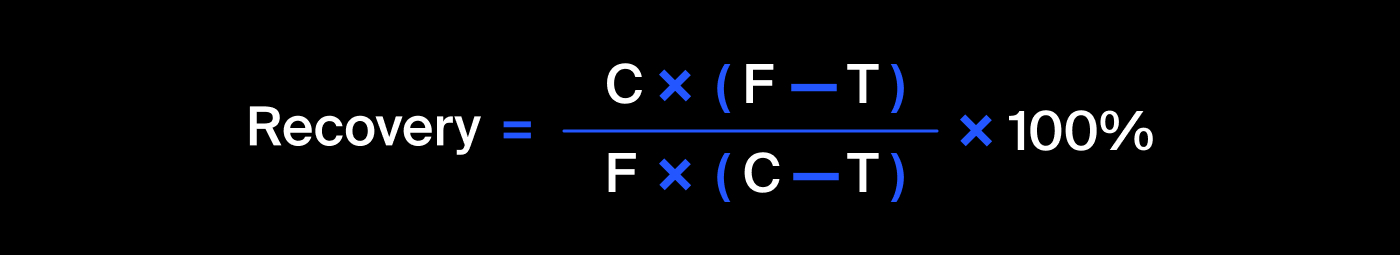

According to the formula , we will need the following variables: 

C = rougher.output.concentrate_au\
F = rougher.input.feed_au\
T = rougher.output.tail_au

In [7]:
def recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    data['recovery_check'] = ((C * (F - T))/(F * (C- T))) * 100
    return data['recovery_check']

In [8]:
recovery_train = recovery(gold_train)
print(recovery_train.mean())

82.52119968211336


Checking the real value of enrichment:

In [9]:
print(gold_train['rougher.output.recovery'].mean())

82.52119968211336


In [10]:
mae = mean_absolute_error(gold_train['recovery_check'], gold_train['rougher.output.recovery'])
print(mae)

9.83758577644259e-15


It can be concluded that the enrichment efficiency is calculated correctly.

### Evaluation of features missing in the test sample

In [11]:
columns_train = set(gold_train.columns)
columns_test = set(gold_test.columns)
col_diff = columns_train - columns_test
col_diff_table = pd.DataFrame(col_diff, columns = ['parameter'])
col_diff_table

,parameter
0,final.output.concentrate_au
1,rougher.output.concentrate_au
2,primary_cleaner.output.concentrate_pb
3,recovery_check
4,rougher.output.concentrate_sol
5,final.output.tail_pb
6,rougher.output.tail_pb
7,final.output.recovery
8,rougher.output.concentrate_pb
9,rougher.calculation.floatbank11_sulfate_to_au_...


The differing rows mainly contain data after flotation and cleaning (correspond to the output stage).

### Data preprocessing

From the previous paragraphs, a sufficient number of omissions were found in all datasets. However, according to the description from the condition, the time-adjacent parameters may be similar. In this case, the omissions will be replaced with values from neighboring rows.

In [12]:
def fill_nas(data):
    data.fillna(method='ffill', inplace=True)
    return display(data.isna().sum())

In [13]:
fill_nas(gold_train)

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
recovery_check            0
Length: 88, dtype: int64

In [14]:
fill_nas(gold_test)

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

In [15]:
fill_nas(gold_full)

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

## Data analysis

### Evaluation of changes in the concentration of elements at all stages

In total, there are 4 stages at which the concentration of elements can be assessed: 
0. Before flotation 
1. After flotation 
2. After the first cleaning
3. After the second cleaning (final)

And we also deal with 3 elements in total: silver (ag), lead (pb), gold (au).

In [16]:
#argentum (ag)
ag_total = gold_full[['rougher.input.feed_ag','rougher.output.concentrate_ag',
                     'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']].copy()

ag_total = ag_total.rename(columns={"rougher.input.feed_ag": "Before flotation", "rougher.output.concentrate_ag": "After flotation",
                        'primary_cleaner.output.concentrate_ag': 'After the 1st cleaning', 'final.output.concentrate_ag':'Final'})

ag_means = pd.DataFrame(ag_total.mean().to_dict(), index=[ag_total.index.values[0]])

print('AG concentration at different stages:')
ag_means

AG concentration at different stages:


,Before flotation,After flotation,After the 1st cleaning,Final
0,8.794927,11.994759,8.442408,5.168387


In [17]:
#plumbum (pb)
pb_total = gold_full[['rougher.input.feed_pb','rougher.output.concentrate_pb',
                     'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']].copy()

pb_total = pb_total.rename(columns={"rougher.input.feed_pb": "Before flotation", "rougher.output.concentrate_pb": "After flotation",
                        'primary_cleaner.output.concentrate_pb': 'After the 1st cleaning', 'final.output.concentrate_pb':'Final'})

pb_means = pd.DataFrame(pb_total.mean().to_dict(), index=[pb_total.index.values[0]])

print('PB concentration at different stages:')
pb_means

PB concentration at different stages:


,Before flotation,After flotation,After the 1st cleaning,Final
0,3.584516,7.606272,9.809276,9.978821


In [18]:
#aurum (au)
au_total = gold_full[['rougher.input.feed_au','rougher.output.concentrate_au',
                     'primary_cleaner.output.concentrate_au','final.output.concentrate_au']].copy()

au_total = au_total.rename(columns={"rougher.input.feed_au": "Before flotation", "rougher.output.concentrate_au": "After flotation",
                        'primary_cleaner.output.concentrate_au': 'After the 1st cleaning', 'final.output.concentrate_au':'Final'})

au_means = pd.DataFrame(au_total.mean().to_dict(), index=[au_total.index.values[0]])

print('AU concentration at different stages:')
au_means

AU concentration at different stages:


,Before flotation,After flotation,After the 1st cleaning,Final
0,8.266097,19.772,32.1194,44.076513


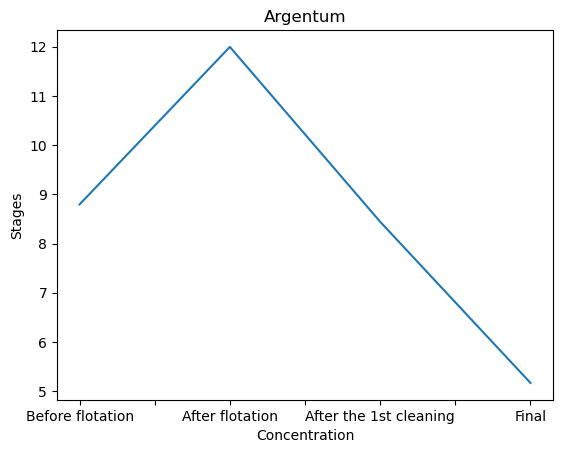

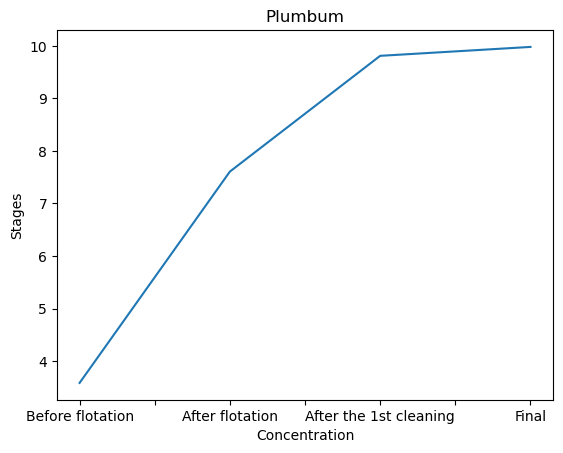

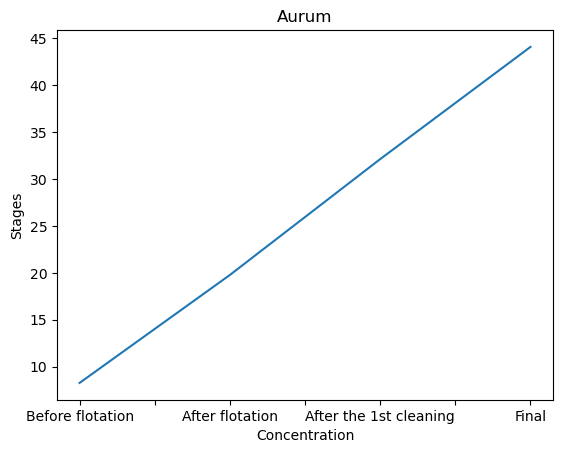

In [19]:
#argentum
ag_total.mean().plot.line()

plt.title('Argentum')
plt.ylabel('Stages')
plt.xlabel('Concentration')
plt.show()

#plumbum
pb_total.mean().plot.line()

plt.title('Plumbum')
plt.ylabel('Stages')
plt.xlabel('Concentration')
plt.show()

#aurum
au_total.mean().plot.line()

plt.title('Aurum')
plt.ylabel('Stages')
plt.xlabel('Concentration')
plt.show()

Based on the obtained graphs , the following conclusions can be drawn:
- After all the stages, the concentration of argentum decreases. The peak concentration can be traced after the flotation stage. At least at the final stage.
- After all the stages, the concentration of plumbum increases greatly. Its peak is observed at the final stage. 
- And also the concentration of aurum increases significantly after all stages. Again, the peak is observed at the final stage.

### Analysis of granule size distribution

In [20]:
feed_size_train = gold_train['rougher.input.feed_size']
feed_size_test = gold_test['rougher.input.feed_size']

On the resulting histogram, it is noticeable that the distributions do not differ significantly.

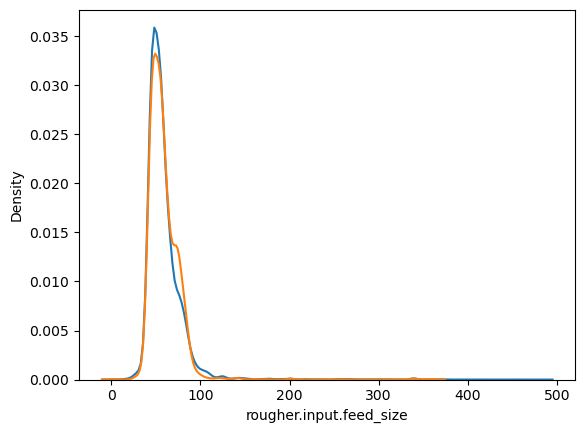

In [21]:
sns.kdeplot(data=feed_size_train)
sns.kdeplot(data=feed_size_test)
plt.show()

It can be seen that the distributions of the two samples are slightly different. 
The training sample is more concentrated around 50 and higher values. And in the test sample we see that the larger value is up to 50.

### Investigation of total concentrations

Here we are interested in three stages: 
- in raw materials
- in rough concentrate
- in the final concentrate

In [22]:
#total concentration in raw materials

total_input = gold_full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)
total_input

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
19434    55.136720
19435    55.723433
19436    54.950157
19437    52.807165
19438    51.941235
Length: 19439, dtype: float64

In [23]:
#total concentration in the rough concentrate

total_rough_output = gold_full[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)
total_rough_output

0        66.424950
1        67.012710
2        66.103793
3        65.752751
4        65.908382
           ...    
19434    62.875473
19435    64.971535
19436    65.149381
19437    66.016067
19438    65.408849
Length: 19439, dtype: float64

In [24]:
#total concentration in the final concentrate

total_final_output = gold_full[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)
total_final_output

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
19434    65.234882
19435    65.978097
19436    65.560640
19437    64.657968
19438    64.185200
Length: 19439, dtype: float64

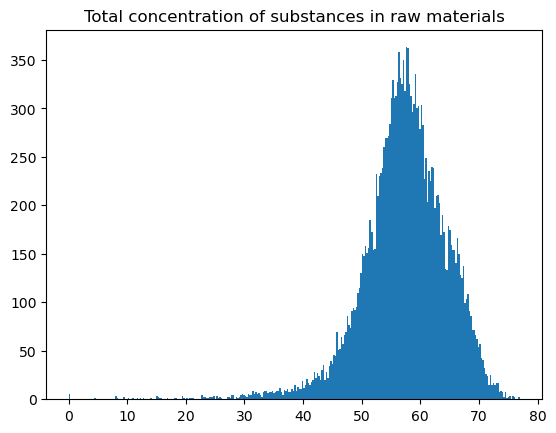

In [25]:
plt.hist(total_input, bins = 300, label='x')
plt.title('Total concentration of substances in raw materials')
plt.show()

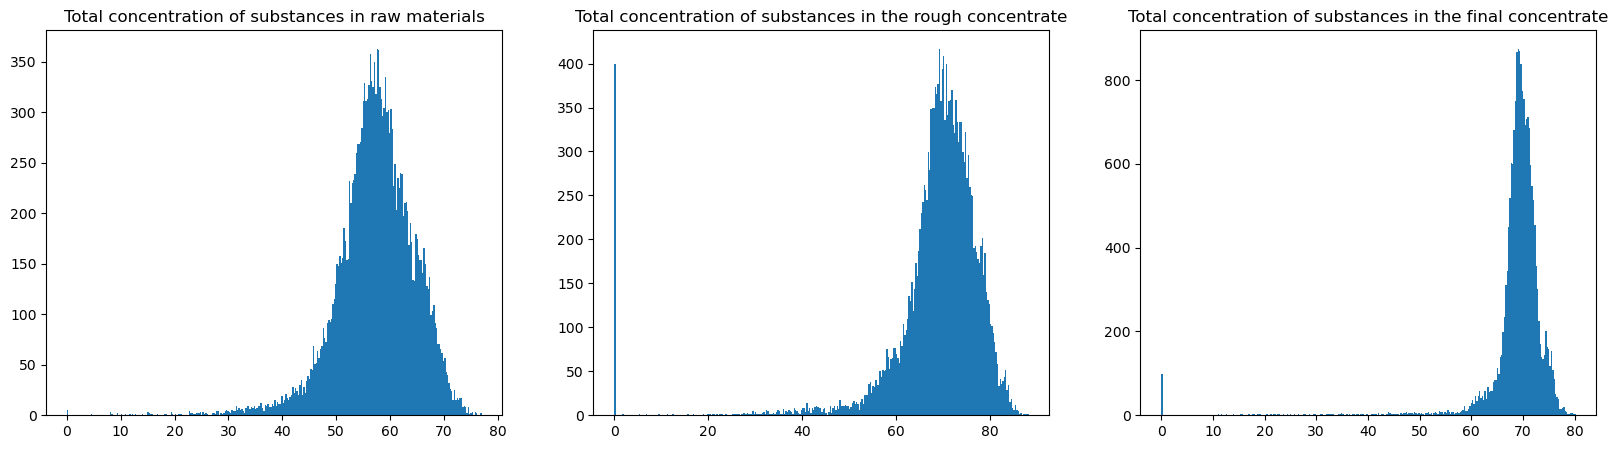

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].hist(total_input, bins = 300, label='x')
axs[0].set_title('Total concentration of substances in raw materials')

axs[1].hist(total_rough_output, bins = 300, label='x')
axs[1].set_title('Total concentration of substances in the rough concentrate')

axs[2].hist(total_final_output, bins = 300, label='x')
axs[2].set_title('Total concentration of substances in the final concentrate')

plt.show()

After the plotted graphs, we see that anomalies are clearly present in the rough concentrate (mostly tending to zero).
Already much less anomalies are observed at the stage of final cleaning.

The largest number of anomalies is observed in the area of zero value, they will be removed from the training sample.

In [27]:
gold_train.shape

(14579, 88)

In [28]:
train_1 = gold_train[(gold_train["rougher.input.feed_ag"] >= 1) & (gold_train["rougher.input.feed_pb"] >= 1) & (gold_train["rougher.input.feed_sol"] >= 1) & (gold_train["rougher.input.feed_au"] >= 1)]
train_2 = train_1[(train_1["rougher.output.concentrate_pb"] >= 1) & (train_1["rougher.output.concentrate_ag"] >= 1) & (train_1["rougher.output.concentrate_sol"] >= 1) & (train_1["rougher.output.concentrate_au"] >= 1)]
train_gold = train_2[(train_2["final.output.concentrate_pb"] >= 1) & (train_2["final.output.concentrate_ag"] >= 1) & (train_2["final.output.concentrate_sol"] >= 1) & (train_2["final.output.concentrate_au"] >= 1)]
print(train_gold.shape)

(13874, 88)


## Model

### Function for calculating sMAPE

sMape is calculated using the following formula:

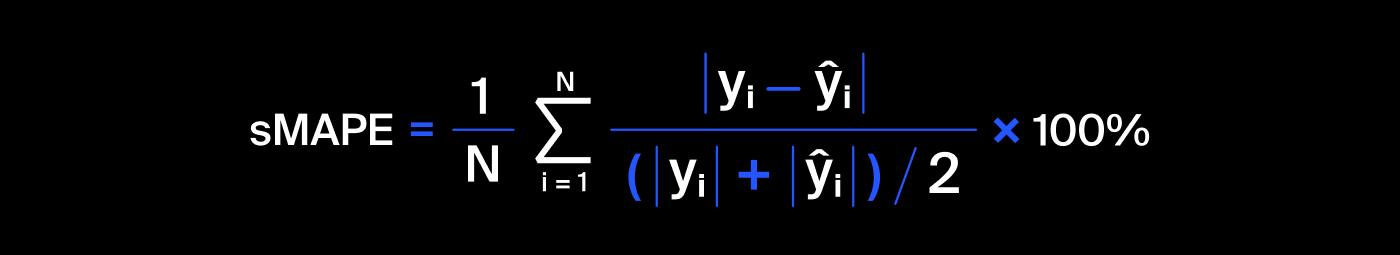

In [29]:
#basic sMAPE
def smape(y_true, y_pred):
    smape_metric = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return smape_metric

#final sMAPE
def smape_total(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Model training and validation

It is necessary to predict two values at once:
- the efficiency of enrichment of rough concentrate rougher.output.recovery;
- the efficiency of enrichment of the final concentrate final.output.recovery.

Considering 2 models: 
- decision tree
- random forest

Since the training and test datasets have a different set of variables, it is important to "level" them before working with models.

In [30]:
missed = gold_full[['rougher.output.recovery', 'final.output.recovery','date']]
gold_test = gold_test.merge(missed, on = 'date')
gold_test = gold_test.drop(['date'],axis=1)

columns_test = set(gold_test.columns)
columns_train = set(train_gold.columns)
train_gold = train_gold.drop(columns_train - columns_test, axis=1)

In [31]:
#defining all the necessary samples on the training dataset
X_train_r = train_gold.drop(['rougher.output.recovery'], axis=1)
y_train_r = train_gold['rougher.output.recovery']

X_train_f = train_gold.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
y_train_f = train_gold['final.output.recovery']

In [32]:
#defining all the necessary samples on the test dataset
X_test_r = gold_test.drop(['rougher.output.recovery'], axis=1)
y_test_r = gold_test['rougher.output.recovery']

X_test_f = gold_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
y_test_f = gold_test['final.output.recovery']

In [33]:
print(X_train_r.shape)
print(y_train_r.shape)

print(X_train_f.shape)
print(y_train_f.shape)

print(X_test_r.shape)
print(y_test_r.shape)

print(X_test_f.shape)
print(y_test_f.shape)

(13874, 53)
(13874,)
(13874, 52)
(13874,)
(4860, 53)
(4860,)
(4860, 52)
(4860,)


As a result, the decision tree model with a depth of 3 showed the best (smallest) value of sMAPE. Let's test this model on a test sample:

To train and test models, we use the GridSearchCV method:

In [34]:
score = make_scorer(smape, greater_is_better=False)

param_grid_rf = {"max_depth" : range(1, 10, 2),
   "n_estimators": range(10, 200, 10)}

param_grid_dt = {"max_depth" : range(1, 10, 2)}

RF_estimator = RandomForestRegressor(random_state=42)
DT_estimator = DecisionTreeRegressor(random_state=42)

#RF
gr_rougher_rf = GridSearchCV(RF_estimator, param_grid_rf, cv=5, scoring = score, verbose = 3)
gr_final_rf = GridSearchCV(RF_estimator, param_grid_rf, cv=5, scoring = score, verbose = 3)

#DT
gr_rougher_dt = GridSearchCV(DT_estimator, param_grid_dt, cv=5, scoring = score, verbose = 3)
gr_final_dt = GridSearchCV(DT_estimator, param_grid_dt, cv=5, scoring = score, verbose = 3)

#RF fit
gr_rougher_rf.fit(X_train_r, y_train_r)
gr_final_rf.fit(X_train_f, y_train_f)

#DT fit
gr_rougher_dt.fit(X_train_r, y_train_r)
gr_final_dt.fit(X_train_f, y_train_f)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END .....max_depth=1, n_estimators=10;, score=-9.090 total time=   0.4s
[CV 2/5] END .....max_depth=1, n_estimators=10;, score=-4.703 total time=   0.4s
[CV 3/5] END .....max_depth=1, n_estimators=10;, score=-4.532 total time=   0.4s
[CV 4/5] END .....max_depth=1, n_estimators=10;, score=-4.874 total time=   0.4s
[CV 5/5] END .....max_depth=1, n_estimators=10;, score=-6.986 total time=   0.4s
[CV 1/5] END .....max_depth=1, n_estimators=20;, score=-9.088 total time=   0.7s
[CV 2/5] END .....max_depth=1, n_estimators=20;, score=-4.729 total time=   0.8s
[CV 3/5] END .....max_depth=1, n_estimators=20;, score=-4.550 total time=   0.7s
[CV 4/5] END .....max_depth=1, n_estimators=20;, score=-4.878 total time=   0.9s
[CV 5/5] END .....max_depth=1, n_estimators=20;, score=-7.006 total time=   0.7s
[CV 1/5] END .....max_depth=1, n_estimators=30;, score=-9.095 total time=   1.1s
[CV 2/5] END .....max_depth=1, n_estimators=30;

[CV 2/5] END .....max_depth=3, n_estimators=20;, score=-4.257 total time=   2.0s
[CV 3/5] END .....max_depth=3, n_estimators=20;, score=-5.003 total time=   2.0s
[CV 4/5] END .....max_depth=3, n_estimators=20;, score=-4.728 total time=   2.0s
[CV 5/5] END .....max_depth=3, n_estimators=20;, score=-6.365 total time=   2.1s
[CV 1/5] END .....max_depth=3, n_estimators=30;, score=-8.437 total time=   3.0s
[CV 2/5] END .....max_depth=3, n_estimators=30;, score=-4.225 total time= 7.6min
[CV 3/5] END .....max_depth=3, n_estimators=30;, score=-4.962 total time=   3.0s
[CV 4/5] END .....max_depth=3, n_estimators=30;, score=-4.719 total time=   3.0s
[CV 5/5] END .....max_depth=3, n_estimators=30;, score=-6.379 total time=   3.1s
[CV 1/5] END .....max_depth=3, n_estimators=40;, score=-8.461 total time=   4.0s
[CV 2/5] END .....max_depth=3, n_estimators=40;, score=-4.160 total time=   4.1s
[CV 3/5] END .....max_depth=3, n_estimators=40;, score=-4.917 total time=   4.0s
[CV 4/5] END .....max_depth=

[CV 4/5] END .....max_depth=5, n_estimators=30;, score=-5.211 total time=   5.5s
[CV 5/5] END .....max_depth=5, n_estimators=30;, score=-5.653 total time=   5.0s
[CV 1/5] END .....max_depth=5, n_estimators=40;, score=-7.819 total time=   6.7s
[CV 2/5] END .....max_depth=5, n_estimators=40;, score=-3.978 total time=   6.4s
[CV 3/5] END .....max_depth=5, n_estimators=40;, score=-4.467 total time=   6.5s
[CV 4/5] END .....max_depth=5, n_estimators=40;, score=-5.167 total time=   6.5s
[CV 5/5] END .....max_depth=5, n_estimators=40;, score=-5.632 total time=   6.4s
[CV 1/5] END .....max_depth=5, n_estimators=50;, score=-7.796 total time=   8.3s
[CV 2/5] END .....max_depth=5, n_estimators=50;, score=-3.977 total time=   8.0s
[CV 3/5] END .....max_depth=5, n_estimators=50;, score=-4.420 total time=   8.2s
[CV 4/5] END .....max_depth=5, n_estimators=50;, score=-5.190 total time=   8.1s
[CV 5/5] END .....max_depth=5, n_estimators=50;, score=-5.677 total time=   8.2s
[CV 1/5] END .....max_depth=

[CV 1/5] END .....max_depth=7, n_estimators=50;, score=-7.344 total time=  12.2s
[CV 2/5] END .....max_depth=7, n_estimators=50;, score=-4.258 total time=  11.2s
[CV 3/5] END .....max_depth=7, n_estimators=50;, score=-4.230 total time=  11.1s
[CV 4/5] END .....max_depth=7, n_estimators=50;, score=-5.427 total time=  11.2s
[CV 5/5] END .....max_depth=7, n_estimators=50;, score=-5.454 total time=  11.5s
[CV 1/5] END .....max_depth=7, n_estimators=60;, score=-7.333 total time=  13.5s
[CV 2/5] END .....max_depth=7, n_estimators=60;, score=-4.194 total time=  13.6s
[CV 3/5] END .....max_depth=7, n_estimators=60;, score=-4.288 total time=  13.6s
[CV 4/5] END .....max_depth=7, n_estimators=60;, score=-5.404 total time=  13.0s
[CV 5/5] END .....max_depth=7, n_estimators=60;, score=-5.428 total time=  13.0s
[CV 1/5] END .....max_depth=7, n_estimators=70;, score=-7.309 total time=  15.5s
[CV 2/5] END .....max_depth=7, n_estimators=70;, score=-4.208 total time=  15.3s
[CV 3/5] END .....max_depth=

[CV 3/5] END .....max_depth=9, n_estimators=60;, score=-4.274 total time=  16.3s
[CV 4/5] END .....max_depth=9, n_estimators=60;, score=-5.665 total time=  16.1s
[CV 5/5] END .....max_depth=9, n_estimators=60;, score=-5.268 total time=  15.8s
[CV 1/5] END .....max_depth=9, n_estimators=70;, score=-7.168 total time=  19.4s
[CV 2/5] END .....max_depth=9, n_estimators=70;, score=-4.169 total time=  18.8s
[CV 3/5] END .....max_depth=9, n_estimators=70;, score=-4.355 total time=  19.1s
[CV 4/5] END .....max_depth=9, n_estimators=70;, score=-5.652 total time=  18.8s
[CV 5/5] END .....max_depth=9, n_estimators=70;, score=-5.259 total time=  18.7s
[CV 1/5] END .....max_depth=9, n_estimators=80;, score=-7.166 total time=  22.6s
[CV 2/5] END .....max_depth=9, n_estimators=80;, score=-4.159 total time=  21.4s
[CV 3/5] END .....max_depth=9, n_estimators=80;, score=-4.375 total time=  21.9s
[CV 4/5] END .....max_depth=9, n_estimators=80;, score=-5.616 total time=  21.3s
[CV 5/5] END .....max_depth=

[CV 4/5] END .....max_depth=1, n_estimators=70;, score=-8.839 total time=   2.5s
[CV 5/5] END ....max_depth=1, n_estimators=70;, score=-10.045 total time=   2.5s
[CV 1/5] END .....max_depth=1, n_estimators=80;, score=-9.265 total time=   2.8s
[CV 2/5] END .....max_depth=1, n_estimators=80;, score=-7.771 total time=   2.8s
[CV 3/5] END .....max_depth=1, n_estimators=80;, score=-8.845 total time=   2.8s
[CV 4/5] END .....max_depth=1, n_estimators=80;, score=-8.823 total time=   2.8s
[CV 5/5] END ....max_depth=1, n_estimators=80;, score=-10.054 total time=   2.8s
[CV 1/5] END .....max_depth=1, n_estimators=90;, score=-9.266 total time=   3.2s
[CV 2/5] END .....max_depth=1, n_estimators=90;, score=-7.769 total time=   3.5s
[CV 3/5] END .....max_depth=1, n_estimators=90;, score=-8.819 total time=   3.3s
[CV 4/5] END .....max_depth=1, n_estimators=90;, score=-8.826 total time=   3.2s
[CV 5/5] END ....max_depth=1, n_estimators=90;, score=-10.051 total time=   3.2s
[CV 1/5] END ....max_depth=1

[CV 1/5] END .....max_depth=3, n_estimators=90;, score=-9.810 total time=   9.0s
[CV 2/5] END .....max_depth=3, n_estimators=90;, score=-7.444 total time=   9.0s
[CV 3/5] END .....max_depth=3, n_estimators=90;, score=-9.218 total time=   9.0s
[CV 4/5] END .....max_depth=3, n_estimators=90;, score=-8.615 total time=   9.0s
[CV 5/5] END .....max_depth=3, n_estimators=90;, score=-9.611 total time=   9.0s
[CV 1/5] END ....max_depth=3, n_estimators=100;, score=-9.807 total time=  10.0s
[CV 2/5] END ....max_depth=3, n_estimators=100;, score=-7.436 total time=  10.0s
[CV 3/5] END ....max_depth=3, n_estimators=100;, score=-9.226 total time=   9.9s
[CV 4/5] END ....max_depth=3, n_estimators=100;, score=-8.604 total time=  10.0s
[CV 5/5] END ....max_depth=3, n_estimators=100;, score=-9.644 total time=  10.9s
[CV 1/5] END ....max_depth=3, n_estimators=110;, score=-9.799 total time=  11.9s
[CV 2/5] END ....max_depth=3, n_estimators=110;, score=-7.436 total time=  11.0s
[CV 3/5] END ....max_depth=3

[CV 3/5] END ....max_depth=5, n_estimators=100;, score=-9.276 total time=  16.1s
[CV 4/5] END ....max_depth=5, n_estimators=100;, score=-9.876 total time=  15.9s
[CV 5/5] END ....max_depth=5, n_estimators=100;, score=-9.761 total time=  16.0s
[CV 1/5] END ....max_depth=5, n_estimators=110;, score=-9.481 total time=  17.5s
[CV 2/5] END ....max_depth=5, n_estimators=110;, score=-7.226 total time=  17.5s
[CV 3/5] END ....max_depth=5, n_estimators=110;, score=-9.245 total time=  17.4s
[CV 4/5] END ....max_depth=5, n_estimators=110;, score=-9.888 total time=  17.4s
[CV 5/5] END ....max_depth=5, n_estimators=110;, score=-9.792 total time=  17.6s
[CV 1/5] END ....max_depth=5, n_estimators=120;, score=-9.464 total time=  19.1s
[CV 2/5] END ....max_depth=5, n_estimators=120;, score=-7.225 total time=  19.0s
[CV 3/5] END ....max_depth=5, n_estimators=120;, score=-9.214 total time=  55.6s
[CV 4/5] END ....max_depth=5, n_estimators=120;, score=-9.964 total time=  19.2s
[CV 5/5] END ....max_depth=5

[CV 5/5] END ...max_depth=7, n_estimators=110;, score=-10.019 total time= 1.6min
[CV 1/5] END ....max_depth=7, n_estimators=120;, score=-9.609 total time=  25.5s
[CV 2/5] END ....max_depth=7, n_estimators=120;, score=-7.265 total time=  25.5s
[CV 3/5] END ....max_depth=7, n_estimators=120;, score=-9.032 total time=  25.3s
[CV 4/5] END ...max_depth=7, n_estimators=120;, score=-10.763 total time=  25.2s
[CV 5/5] END ....max_depth=7, n_estimators=120;, score=-9.932 total time=  25.8s
[CV 1/5] END ....max_depth=7, n_estimators=130;, score=-9.608 total time=  27.8s
[CV 2/5] END ....max_depth=7, n_estimators=130;, score=-7.271 total time=  27.7s
[CV 3/5] END ....max_depth=7, n_estimators=130;, score=-9.057 total time=31.6min
[CV 4/5] END ...max_depth=7, n_estimators=130;, score=-10.658 total time=16.4min
[CV 5/5] END ....max_depth=7, n_estimators=130;, score=-9.928 total time=26.6min
[CV 1/5] END ....max_depth=7, n_estimators=140;, score=-9.624 total time=30.6min
[CV 2/5] END ....max_depth=7

[CV 2/5] END ....max_depth=9, n_estimators=130;, score=-7.258 total time=  35.0s
[CV 3/5] END ....max_depth=9, n_estimators=130;, score=-8.849 total time=  35.2s
[CV 4/5] END ...max_depth=9, n_estimators=130;, score=-10.898 total time=  35.7s
[CV 5/5] END ...max_depth=9, n_estimators=130;, score=-10.076 total time=  36.0s
[CV 1/5] END ....max_depth=9, n_estimators=140;, score=-9.916 total time=  39.4s
[CV 2/5] END ....max_depth=9, n_estimators=140;, score=-7.267 total time=  40.3s
[CV 3/5] END ....max_depth=9, n_estimators=140;, score=-8.871 total time=  38.2s
[CV 4/5] END ...max_depth=9, n_estimators=140;, score=-10.818 total time=  37.9s
[CV 5/5] END ...max_depth=9, n_estimators=140;, score=-10.115 total time=  39.5s
[CV 1/5] END ....max_depth=9, n_estimators=150;, score=-9.903 total time=  41.8s
[CV 2/5] END ....max_depth=9, n_estimators=150;, score=-7.265 total time=  41.8s
[CV 3/5] END ....max_depth=9, n_estimators=150;, score=-8.754 total time=  41.3s
[CV 4/5] END ...max_depth=9,

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 10, 2)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=3)

In [35]:
#RF
print(gr_rougher_rf.best_params_)
print(gr_final_rf.best_params_)
print()
#DT
print(gr_rougher_dt.best_params_)
print(gr_final_dt.best_params_)

{'max_depth': 9, 'n_estimators': 140}
{'max_depth': 3, 'n_estimators': 10}

{'max_depth': 7}
{'max_depth': 1}


In [36]:
#RF
best_score_rougher_rf = gr_rougher_rf.best_score_
best_score_final_rf = gr_final_rf.best_score_

#DT
best_score_rougher_dt = gr_rougher_dt.best_score_
best_score_final_dt = gr_final_dt.best_score_

In [37]:
print("Random forest (rougher):", best_score_rougher_rf,"Random forest (final):", best_score_final_rf)

print("Decision tree (rougher):", best_score_rougher_dt,"Decision tree (final):", best_score_final_dt)

print()

print('sMAPE random forest', smape_total(best_score_rougher_rf,best_score_final_rf))
print('sMAPE decision tree', smape_total(best_score_rougher_dt,best_score_final_dt))

Random forest (rougher): -5.284277844418566 Random forest (final): -8.855368330942436
Decision tree (rougher): -6.121845780295773 Decision tree (final): -9.133893854966635

sMAPE random forest -7.9625957093114685
sMAPE decision tree -8.380881836298919


According to the results of GridSearch, a random forest demonstrates the best version of the model.

In [38]:
test_r_pred = gr_rougher_rf.best_estimator_.predict(X_test_r)
test_f_pred = gr_final_rf.best_estimator_.predict(X_test_f)

smape_r = smape(y_test_r, test_r_pred)
smape_f = smape(y_test_f, test_f_pred)

print('Final sMAPE (test):', smape_total(smape_r, smape_f))

Final sMAPE (test): 6.78312043193574


For the final evaluation of the model, let's compare it with the constant model.

In [39]:
constant_r = DummyRegressor(strategy="mean")
constant_f = DummyRegressor(strategy="mean")

constant_r.fit(X_train_r, y_train_r)
constant_f.fit(X_train_f, y_train_f)

test_r_pred_1 = constant_r.predict(X_test_r)
test_f_pred_1 = constant_f.predict(X_test_f)

smape_r_1 = smape(y_test_r, test_r_pred_1)
smape_f_1 = smape(y_test_f, test_f_pred_1)

print('Final sMAPE (constant model):',smape_total(smape_r_1,smape_f_1).mean())

Final sMAPE (constant model): 8.428368301485829


The variant of the model after gridserch shows a sMAPE almost equal to the sMAPE of the constant model.

At the same time, if we implement a random forest through a loop, we get a smaller sMAPE:

In [40]:
#random forest model
for depth in range(1,10):
  for est in range(10, 100, 10):
    model_rf = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=42)
    
    score = make_scorer(smape, greater_is_better=False)

    rf_r = cross_val_score(model_rf, X_train_r, y_train_r, scoring=score, cv=5)
    rf_f = cross_val_score(model_rf, X_train_f, y_train_f, scoring=score, cv=5)
    
    print('Best model estimator:',est)
    print('Best model depth:', depth)
    print('Final sMAPE:', smape_total(rf_r, rf_f).mean())

print()

Best model estimator: 10
Best model depth: 1
Final sMAPE: -8.191726652215921
Best model estimator: 20
Best model depth: 1
Final sMAPE: -8.209789767062912
Best model estimator: 30
Best model depth: 1
Final sMAPE: -8.221411233817511
Best model estimator: 40
Best model depth: 1
Final sMAPE: -8.233922515362309
Best model estimator: 50
Best model depth: 1
Final sMAPE: -8.230240566200981
Best model estimator: 60
Best model depth: 1
Final sMAPE: -8.227906568854452
Best model estimator: 70
Best model depth: 1
Final sMAPE: -8.230285905762717
Best model estimator: 80
Best model depth: 1
Final sMAPE: -8.226062462465965
Best model estimator: 90
Best model depth: 1
Final sMAPE: -8.221339703014749
Best model estimator: 10
Best model depth: 2
Final sMAPE: -8.043635451722746
Best model estimator: 20
Best model depth: 2
Final sMAPE: -8.038332052175765
Best model estimator: 30
Best model depth: 2
Final sMAPE: -8.060666598186154
Best model estimator: 40
Best model depth: 2
Final sMAPE: -8.075451381312277

We get the best model with depth = 3 and n_estimators = 10.

In [41]:
#rougher
model_rf_r = RandomForestRegressor(max_depth = 3, n_estimators = 10 , random_state=42)
model_rf_r.fit(X_train_r, y_train_r)
test_r_pred = model_rf_r.predict(X_test_r)
smape_r_2 = smape(y_test_r, test_r_pred)

#final
model_rf_f = RandomForestRegressor(max_depth = 3, n_estimators = 10 , random_state=42)
model_rf_f.fit(X_train_f, y_train_f)
test_f_pred = model_rf_f.predict(X_test_f)
smape_f_2 = smape(y_test_f, test_f_pred)

print('Final sMAPE (test):', smape_total(smape_r_2,smape_f_2).mean())

Final sMAPE (test): 7.182035628197294


As a result, we can conclude that, after all, a random forest in the current project achieves a good result in terms of sMAPE evaluation. The error due to the difference in results with GridSearch and the "loop" method is explained by the difference in the approaches themselves.

## Conclusion

As a result of the conducted research: 
- the initial data with the parameters of extraction and purification were studied and prepared;   
- all key parameters were analyzed;
- the correct calculation of the recovery parameter in the training sample was checked;
- different models were analyzed, as a result of which the final model turned out to be a random forest model.